In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#from mpl_toolkits.basemap import basemap
path1=os.getcwd()

# Loading the data and removing the NA values from the data

In [2]:
path=path1+'/file/Train.csv'
data=pd.read_csv(path)
print(data.shape)
data_na=data.dropna(inplace=False)
print(data.shape)


(34226, 16)
(34226, 16)


# converting the date object to datetime format and extracting month and year of reviews

In [3]:
data['last_review']=data['last_review'].astype('datetime64[ns]')
data['month_of_review']=pd.DatetimeIndex(data['last_review']).month
data['year_of_review']=pd.DatetimeIndex(data['last_review']).year



In [4]:
data_na['last_review']=data_na['last_review'].astype('datetime64[ns]')
data_na['month_of_review']=pd.DatetimeIndex(data_na['last_review']).month
data_na['year_of_review']=pd.DatetimeIndex(data_na['last_review']).year
#data_na.head()

<ipython-input-4-83c2f285f002>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_na['last_review']=data_na['last_review'].astype('datetime64[ns]')
<ipython-input-4-83c2f285f002>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_na['month_of_review']=pd.DatetimeIndex(data_na['last_review']).month
<ipython-input-4-83c2f285f002>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

# Boxplot of price for different neighbourhoods and room types
    plotting after removing of the Nan values from the data and storing the in data_na dataframe
    

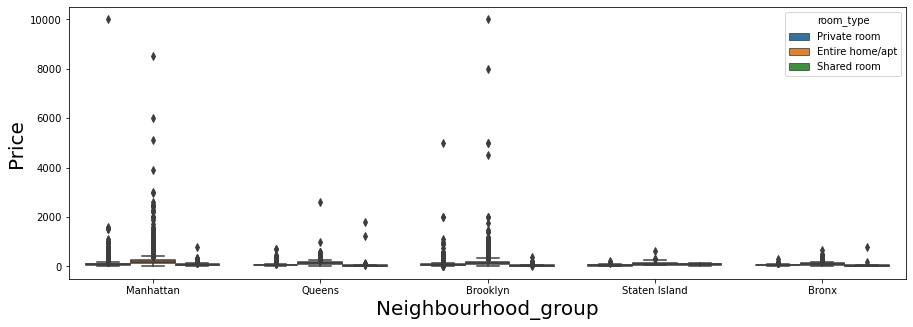

In [5]:
plt.figure(figsize=(15,5))
#Here we have restricted the y-axis between 0 and 300 
#plt.ylim(0,300)
sns.boxplot(x='neighbourhood_group',y='price',data=data_na,hue='room_type')
plt.xlabel('Neighbourhood_group',size=20)
plt.ylabel('Price',size=20)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

# same plot with setting the ylimits

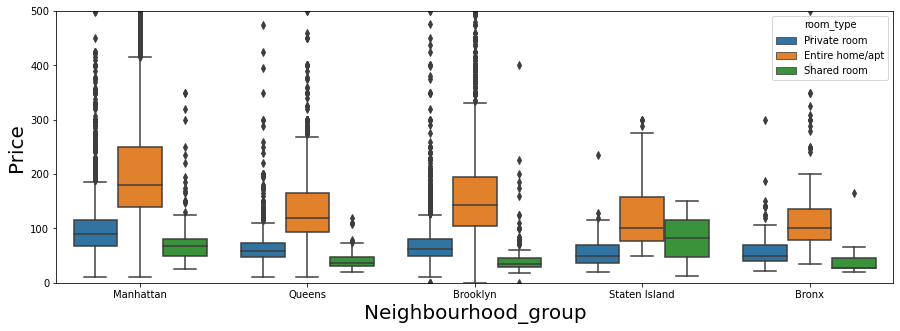

In [6]:
plt.figure(figsize=(15,5))
#Here we have restricted the y-axis between 0 and 300 
plt.ylim(0,500)
sns.boxplot(x='neighbourhood_group',y='price',data=data_na,hue='room_type')
plt.xlabel('Neighbourhood_group',size=20)
plt.ylabel('Price',size=20)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

# Distribution of properties along the lat and long coordinates

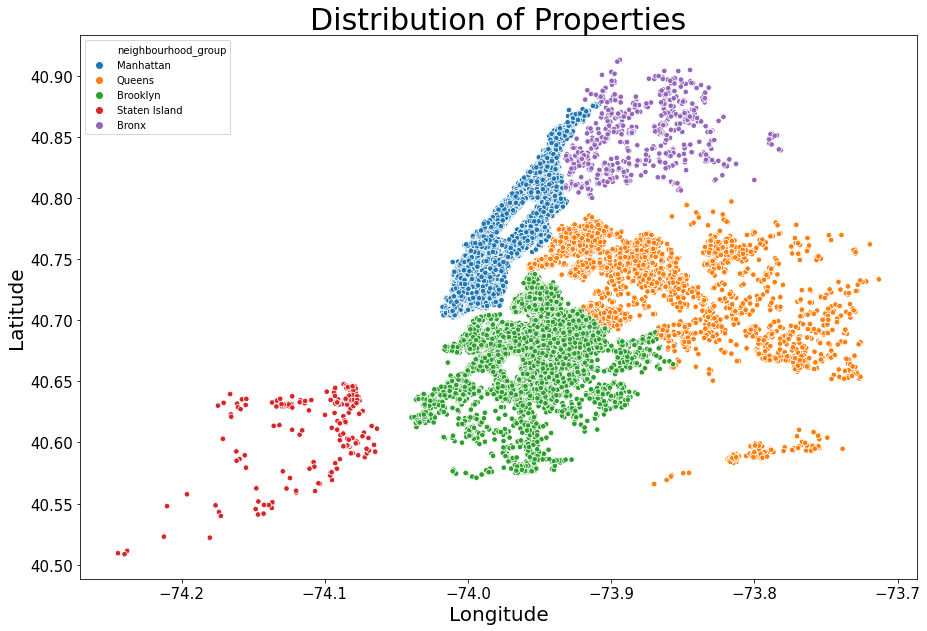

In [7]:
plt.figure(figsize=(15,10))
sns.scatterplot(y=data_na['latitude'],x=data_na['longitude'],hue=data_na['neighbourhood_group'],s=30)
plt.xlabel('Longitude',size=20)
plt.ylabel('Latitude',size=20)
plt.title('Distribution of Properties',size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

# For getting information of how many properties are listed according to neighbourhood_group.

In [8]:
data.groupby(data_na['neighbourhood_group']).room_type.describe()

,count,unique,top,freq
neighbourhood_group,,,,
Bronx,618,3,Private room,366
Brooklyn,11512,3,Entire home/apt,5751
Manhattan,11671,3,Entire home/apt,6990
Queens,3213,3,Private room,1861
Staten Island,216,3,Private room,115


# Most popular properties based on availability

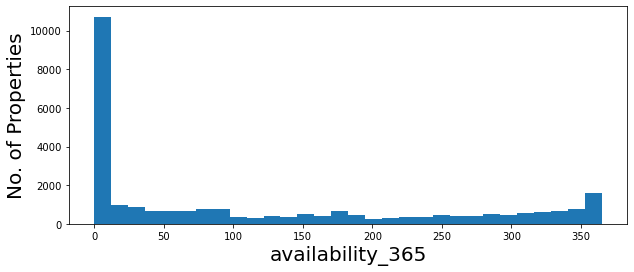

In [9]:
plt.figure(figsize=(10,4))
plt.hist(data_na['availability_365'],bins=30)
plt.xlabel('availability_365',size=20)
plt.ylabel('No. of Properties',size=20)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

# Most popular properties in different neighbourhood_group

In [10]:
data_na[(data_na['availability_365']<50)].groupby(data_na['neighbourhood_group']).count()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,month_of_review,year_of_review
neighbourhood_group,,,,,,,,,,,,,,,,,,
Bronx,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159
Brooklyn,5969,5969,5969,5969,5969,5969,5969,5969,5969,5969,5969,5969,5969,5969,5969,5969,5969,5969
Manhattan,6045,6045,6045,6045,6045,6045,6045,6045,6045,6045,6045,6045,6045,6045,6045,6045,6045,6045
Queens,1077,1077,1077,1077,1077,1077,1077,1077,1077,1077,1077,1077,1077,1077,1077,1077,1077,1077
Staten Island,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33


# During which month we get the more number of reviews?

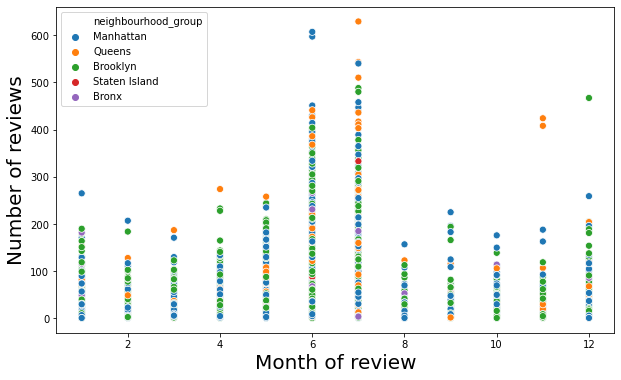

In [11]:
plt.figure(figsize=(10,6))
sns.scatterplot(y=data_na['number_of_reviews'],x=data_na['month_of_review'],hue=data_na['neighbourhood_group'],s=50)
plt.xlabel('Month of review',size=20)
plt.ylabel('Number of reviews',size=20)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

# Reviews over the year

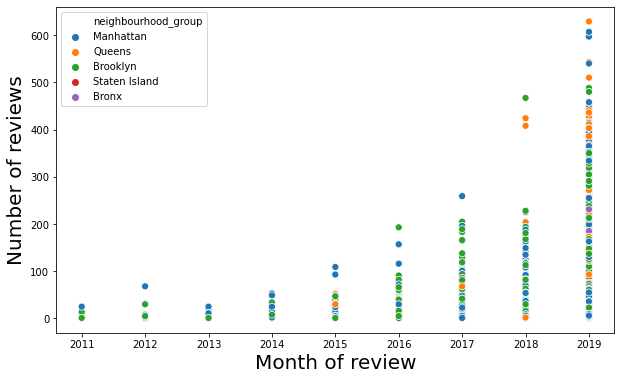

In [12]:
plt.figure(figsize=(10,6))
sns.scatterplot(y=data_na['number_of_reviews'],x=data_na['year_of_review'],hue=data_na['neighbourhood_group'],s=50)
plt.xlabel('Month of review',size=20)
plt.ylabel('Number of reviews',size=20)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

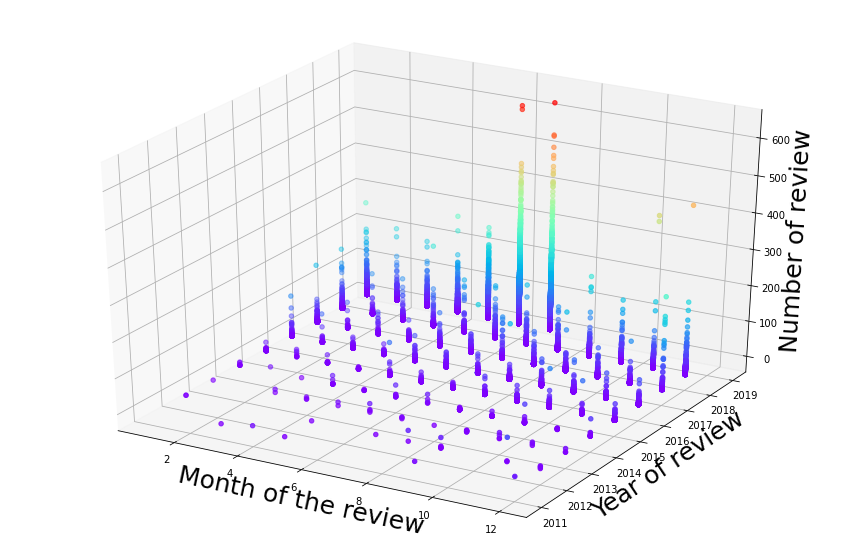

In [13]:
x=data['month_of_review']
y=data['year_of_review']
z=data['number_of_reviews']

fig=plt.figure(figsize=(15,10))
ax=plt.axes(projection='3d')
ax.set_xlabel('Month of the review',size=25)
ax.set_ylabel('Year of review',size=25)
ax.set_zlabel('Number of review',size=25)

ax.scatter3D(x,y,z,c=z,cmap='rainbow')
plt.show()

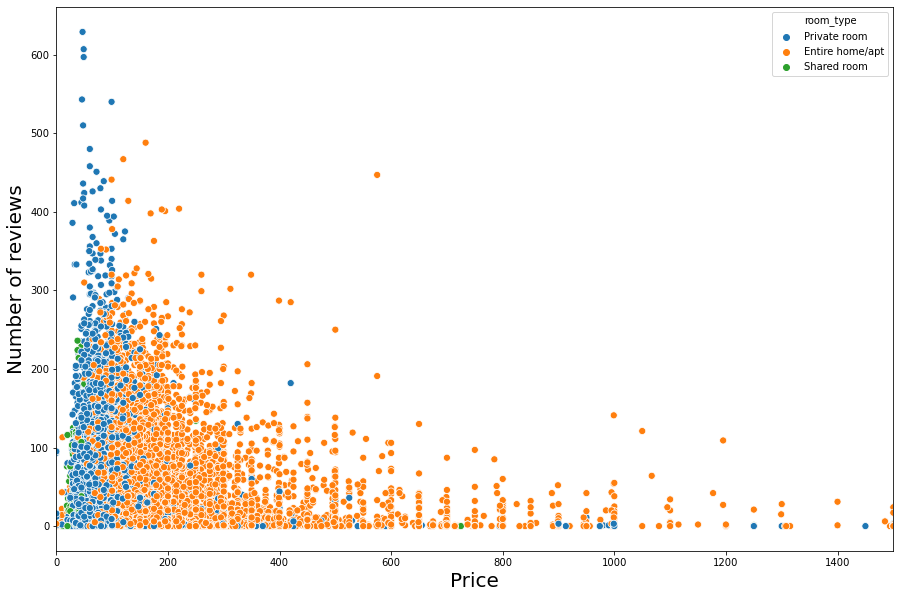

In [14]:
MP=data[data['availability_365']<=360]

plt.figure(figsize=(15,10))
plt.xlim(0,1500)

sns.scatterplot(y=MP['number_of_reviews'],x=MP['price'],hue=MP['room_type'],s=50)
plt.xlabel('Price',size=20)
plt.ylabel('Number of reviews',size=20)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

# Now coming to do the linear regression.
    # We have to calculate the distance of the properties from the Manhattan city center

In [15]:
dr2=data[['latitude','longitude']]
dr3=dr2.to_numpy()

import math
dr5=dr3*math.pi/180

dr4=dr3*math.pi/180
#dr4 Distance is calculated from the Manhattan city center (taken from google)
dr4[:,0] -= 40.7831*math.pi/180
dlat=dr4[:,0]
dlon=dr4[:,1]

dlon -= -73.9712*math.pi/180

a=[]
for i in range(len(dr3)):
    a.append(math.sin(dlat[i]/2)**2+math.cos(dr5[i][0])*math.cos(40.7831*math.pi/180)*math.sin(dlon[i]/2)**2)
    
c=[]
for i in range(len(dr3)):
    c.append(math.atan2(math.sqrt(a[i]),math.sqrt(1-a[i])))
    
d=[]
for i in range(len(dr3)):
    d.append(6373.0*c[i]*1000)
    
    
data['Distance in m']= d

# Removing some outliers and preparing x_train and y_train data

In [39]:
D1=data[(data['price'] > 0)&(data['price'] < 10001)]
D1.groupby(D1['room_type']).price.describe()
D2=np.log(D1['Distance in m'])
D1['Distance in m new']=D2

<ipython-input-39-23162497bec9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  D1['Distance in m new']=D2


In [40]:
X=D1[['neighbourhood_group','latitude','longitude','room_type','Distance in m']]

# Converting the room_type and also neighbourhood group to some numerical values from {1,2,3} for room_type and {1,2,3,4,5} for neighbourhood_group

In [41]:
col = X.room_type
col.head()

coln =[]

for rmtype in col:
    if(rmtype=='Private room'):
        coln.append(1)
    if(rmtype=='Entire home/apt'):
        coln.append(2)
    if(rmtype=='Shared room'):
        coln.append(3)
        
X["room_type_new"]=coln

X.head()

col1 = X.neighbourhood_group
col1.head()

coln1 =[]

for nghood in col1:
    if(nghood=='Manhattan'):
        coln1.append(1)
    if(nghood=='Brooklyn'):
        coln1.append(2)
    if(nghood=='Bronx'):
        coln1.append(3)
    if(nghood=='Queens'):
        coln1.append(4)
    if(nghood=='Staten Island'):
        coln1.append(5)    
X["room_type_new"]=coln
X['Neighbourhood_new']=coln1

<ipython-input-41-25e1254291c6>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["room_type_new"]=coln
<ipython-input-41-25e1254291c6>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["room_type_new"]=coln
<ipython-input-41-25e1254291c6>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

# Linear regression model for price.
    -We have made a logarithmic transformation (natural logarithm) Since price distribution is skewed-
    -If the distribution is converted to normal-that will result in good score when compared to skewed distribution

In [47]:
Xn=X[['room_type_new','longitude','Distance in m']]
Y=D1['price']
#Y=np.log(Y)

from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer 

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Xn,Y,test_size=0.2, random_state=10)
from sklearn.linear_model import LinearRegression
sklr = LinearRegression()
sklr.fit(X_train,y_train)
sklr.score(X_test,y_test)

0.086441483154865

In [49]:
import math
from sklearn.metrics import mean_squared_error
y_pred=sklr.predict(X_test)

# y_pred_converted = [(np.exp(x)) for x in [i for i in y_pred]]
# y_test_converted = [(np.exp(x)) for x in [i for i in y_test]]
#reg_model_mse=mean_squared_error(y_pred_converted,y_test_converted)
reg_model_mse=mean_squared_error(y_pred,y_test)
print(math.sqrt(reg_model_mse))

191.94805417327947


# After one hot encoding : we use pandas comman get_dummies

In [50]:
X_enc_rt = pd.get_dummies(data.room_type, prefix='Roomtype')
X_enc_nh = pd.get_dummies(data.neighbourhood_group, prefix='NBG')
X_enc_ng = pd.get_dummies(data.neighbourhood, prefix='NB')
X_enc_hname=pd.get_dummies(data.host_name,prefix='HName')

In [51]:
Var = pd.concat([data, X_enc_rt,X_enc_nh,X_enc_ng], axis=1)
D1=Var[(Var['price'] > 0)]
#D2=D1.iloc[:,7:26]
n1=np.log(D1['price'])
n2=np.log(D1['Distance in m'])
D1['price new']=n1
D1['Distance new']=n2
D1.head()

<ipython-input-51-fa2bcd1a85cf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  D1['price new']=n1
<ipython-input-51-fa2bcd1a85cf>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  D1['Distance new']=n2


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,NB_Westerleigh,NB_Whitestone,NB_Williamsbridge,NB_Williamsburg,NB_Windsor Terrace,NB_Woodhaven,NB_Woodlawn,NB_Woodside,price new,Distance new
0,5728806,Large private room in Nolita,4271676,Nat,Manhattan,Nolita,40.72217,-73.99481,Private room,120,...,0,0,0,0,0,0,0,0,4.787492,8.169504
1,2243769,Super Bowl New York City Apartment,11460768,Brian,Manhattan,Upper West Side,40.80020,-73.96045,Entire home/apt,1500,...,0,0,0,0,0,0,0,0,7.313220,6.959623
2,35515415,COZY APT CLOSE TO LGA & JFK AND TRANSPORTATION,267193767,Jenny,Queens,East Elmhurst,40.75558,-73.89316,Entire home/apt,200,...,0,0,0,0,0,0,0,0,5.298317,8.195852
3,36202006,Stream-Pressed Paradise (Laundry Room Setup),43392243,Rita,Staten Island,Concord,40.60110,-74.07830,Shared room,30,...,0,0,0,0,0,0,0,0,3.401197,9.313236
4,3780951,Charming Harlem apartment,16065171,Gina,Manhattan,Harlem,40.81022,-73.94266,Shared room,115,...,0,0,0,0,0,0,0,0,4.744932,7.564448
